# Air Quality Prediction (Using Linear Regression)

### Hello Everyone! Myself Yashank Rajvanshi, an enthusiast Data Analytics Engineer with an experience of more than 4 years in this field and having knowlegde of Python, PowerBI, DAX, VBA, Advanced Excel, Artificial Intelligence, Preprocessing Tools, Machine Learning. I am currently in my Final of year B.Tech Degree. My dicipline is Information Technology (IT). I have completed various projects and a 5 month internship experience as Data Analytics Intern at Kashsam Data Solutions.

#### This section explains the linear regression model and the overall workflow of your code for predicting AQI (Air Quality Index) using pollutant data. Here are the key points:

#### 1. Model Objective
The goal of the model is to predict the AQI based on various pollutants such as PM2.5, PM10, NO, NO2, CO, etc. By training a linear regression model on the available dataset, the model aims to establish relationships between pollutant concentrations and AQI values.

#### 2. Feature Selection
- Input Features (X): The model uses a subset of pollutant-related features (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene) as input variables.

- Target Variable (Y): The AQI column is used as the target variable that the model aims to predict.

This input-output relationship assumes that pollutants significantly influence the AQI, and the model will attempt to quantify these effects.

#### 3. Linear Regression Model
- Model Creation: A linear regression model from sklearn.linear_model is instantiated. This model assumes a linear relationship between the pollutants and AQI.

Mathematically, the model predicts AQI as:

            AQI = β0 + β1 × PM2.5 + β2 × PM10 + ⋯ + βn × Xylene

Where:

        - β0 is the intercept.
        - 𝛽1, 𝛽2,…,𝛽𝑛 are the coefficients for the respective pollutants.

- Model Fitting: The fit() method is used to train the model on the data (x and y). The model learns the best-fit line by minimizing the sum of squared residuals between the actual and predicted AQI values.

#### 4. Prediction
- Predicting AQI: After fitting the model, the predict() function is used to predict AQI based on given pollutant concentrations. For instance, pollutant values [67.45, 118.12, 0.97, 15.69, ...] are passed into the model to predict the AQI.

The predicted AQI is a weighted sum of the pollutants' values based on the model’s learned coefficients.

#### 5. Model Coefficients and Intercept
- Coefficients (a): The model’s coef_ attribute holds the coefficients for each pollutant. These coefficients indicate the magnitude and direction of the relationship between each pollutant and AQI.

        - A positive coefficient means an increase in that pollutant raises the AQI.
        - A negative coefficient suggests that an increase in the pollutant decreases the AQI.
- Intercept (b): The intercept_ is the model's baseline AQI value when all pollutants are zero.

#### 6. Linear Regression Equation
The linear regression model generates the following form of the equation for predicting AQI:
                       AQI=(coefficient1 x PM2.5) + (coefficient2 × PM10) + ...+ intercept

By plugging in the pollutant values, the AQI can be predicted for any new data point.

7. Performance Insights
While the model can predict AQI based on pollutant data, its accuracy and reliability will depend on the strength of the relationships between pollutants and AQI in the dataset. To evaluate model performance:

        - R-squared score: This can be used to measure how well the model fits the data.
        - Residual analysis: Observing the difference between actual and predicted AQI can provide insights into model errors.

#### 8. Limitations and Considerations
- Assumption of Linearity: The model assumes that the relationship between pollutants and AQI is linear, which might not capture more complex relationships.
- Pollutant Interaction Effects: The model does not account for interaction effects between pollutants, which could potentially influence AQI in a nonlinear manner.
- Handling of Missing Values: Missing values were imputed with means, which could affect the accuracy of the model, especially if the missing data was not randomly distributed.

#### 9. Further Steps
- Model Improvement: You may improve the model by experimenting with more advanced algorithms (e.g., polynomial regression, decision trees) or by incorporating additional features, such as meteorological data.
- Evaluation: Evaluate the model using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to quantify prediction accuracy.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### This structured approach allows for predicting AQI using linear regression while providing a clear understanding of the relationships between pollutants and air quality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
d = pd.read_csv('city_day.csv')
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
d.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
d.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:
d.shape

(29531, 16)

In [7]:
d.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
d.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
d.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
d.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
pmean=d["PM2.5"].mean()
d["PM2.5"].fillna(pmean,inplace=True)

In [13]:
pmmean=d["PM10"].mean()
d["PM10"].fillna(pmmean,inplace=True)

In [14]:
nmean=d["NO"].mean()
d["NO"].fillna(nmean,inplace=True)

In [15]:
nomean=d["NO2"].mean()
d["NO2"].fillna(nomean,inplace=True)

In [16]:
noxmean=d["NOx"].mean()
d["NOx"].fillna(noxmean,inplace=True)

In [17]:
nhmean=d["NH3"].mean()
d["NH3"].fillna(nhmean,inplace=True)

In [18]:
cmean=d["CO"].mean()
d["CO"].fillna(cmean,inplace=True)

In [19]:
smean=d["SO2"].mean()
d["SO2"].fillna(smean,inplace=True)

In [20]:
omean=d["O3"].mean()
d["O3"].fillna(omean,inplace=True)

In [21]:
bmean=d["Benzene"].mean()
d["Benzene"].fillna(bmean,inplace=True)

In [22]:
tmean=d["Toluene"].mean()
d["Toluene"].fillna(tmean,inplace=True)

In [23]:
xmean=d["Xylene"].mean()
d["Xylene"].fillna(xmean,inplace=True)

In [24]:
amean=d["AQI"].mean()
d["AQI"].fillna(amean,inplace=True)

In [25]:
d.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [26]:
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


### Heatmap

<Axes: >

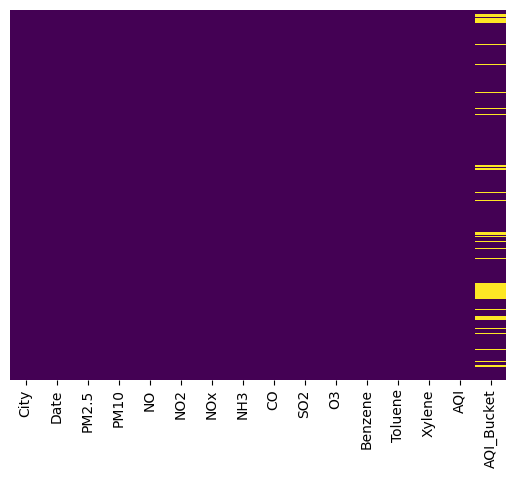

In [27]:

sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Multiple Markers

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

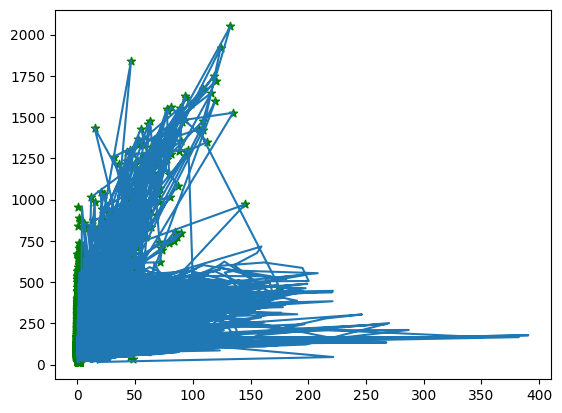

In [28]:
plt.scatter(d.CO,d.AQI,color='green',marker='*')
plt.plot(d.NO,d.AQI,)
plt.plot

In [29]:
x=d.iloc[:,2:13].values
y=d.iloc[:,-2].values

In [30]:
x

array([[6.74505779e+01, 1.18127103e+02, 9.20000000e-01, ...,
        1.33360000e+02, 0.00000000e+00, 2.00000000e-02],
       [6.74505779e+01, 1.18127103e+02, 9.70000000e-01, ...,
        3.40600000e+01, 3.68000000e+00, 5.50000000e+00],
       [6.74505779e+01, 1.18127103e+02, 1.74000000e+01, ...,
        3.07000000e+01, 6.80000000e+00, 1.64000000e+01],
       ...,
       [2.29100000e+01, 6.57300000e+01, 3.45000000e+00, ...,
        3.09600000e+01, 1.00000000e-02, 1.00000000e-02],
       [1.66400000e+01, 4.99700000e+01, 4.05000000e+00, ...,
        2.83000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 6.60000000e+01, 4.00000000e-01, ...,
        1.70500000e+01, 3.28084030e+00, 8.70097208e+00]])

In [31]:
y

array([166.46358149, 166.46358149, 166.46358149, ...,  68.        ,
        54.        ,  50.        ])

### Create the linear regression object

In [32]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [33]:
model.predict([[67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000]])

array([152.71532406])

### Predict the AQI

In [34]:
a=model.coef_
b=model.intercept_
y_pred=a*x+b
y_pred

array([[81.3682192 , 47.96751693, 15.17641515, ..., 40.97605866,
        15.22503503, 15.22789089],
       [81.3682192 , 47.96751693, 15.17377277, ..., 21.80181866,
        14.46158005, 16.01039588],
       [81.3682192 , 47.96751693, 14.30548507, ..., 21.15302263,
        13.814303  , 17.56683827],
       ...,
       [37.69097077, 33.44408284, 15.04271047, ..., 21.20322708,
        15.22296043, 15.22646296],
       [31.5425021 , 29.0757245 , 15.01100185, ..., 20.68959689,
        15.22503503, 15.22503503],
       [29.93429021, 33.51892146, 15.20389595, ..., 18.51728873,
        14.54438996, 16.4674719 ]])

## 1. Data Distribution and Correlation Insights

### Visualize Distribution of Pollutants and AQI:

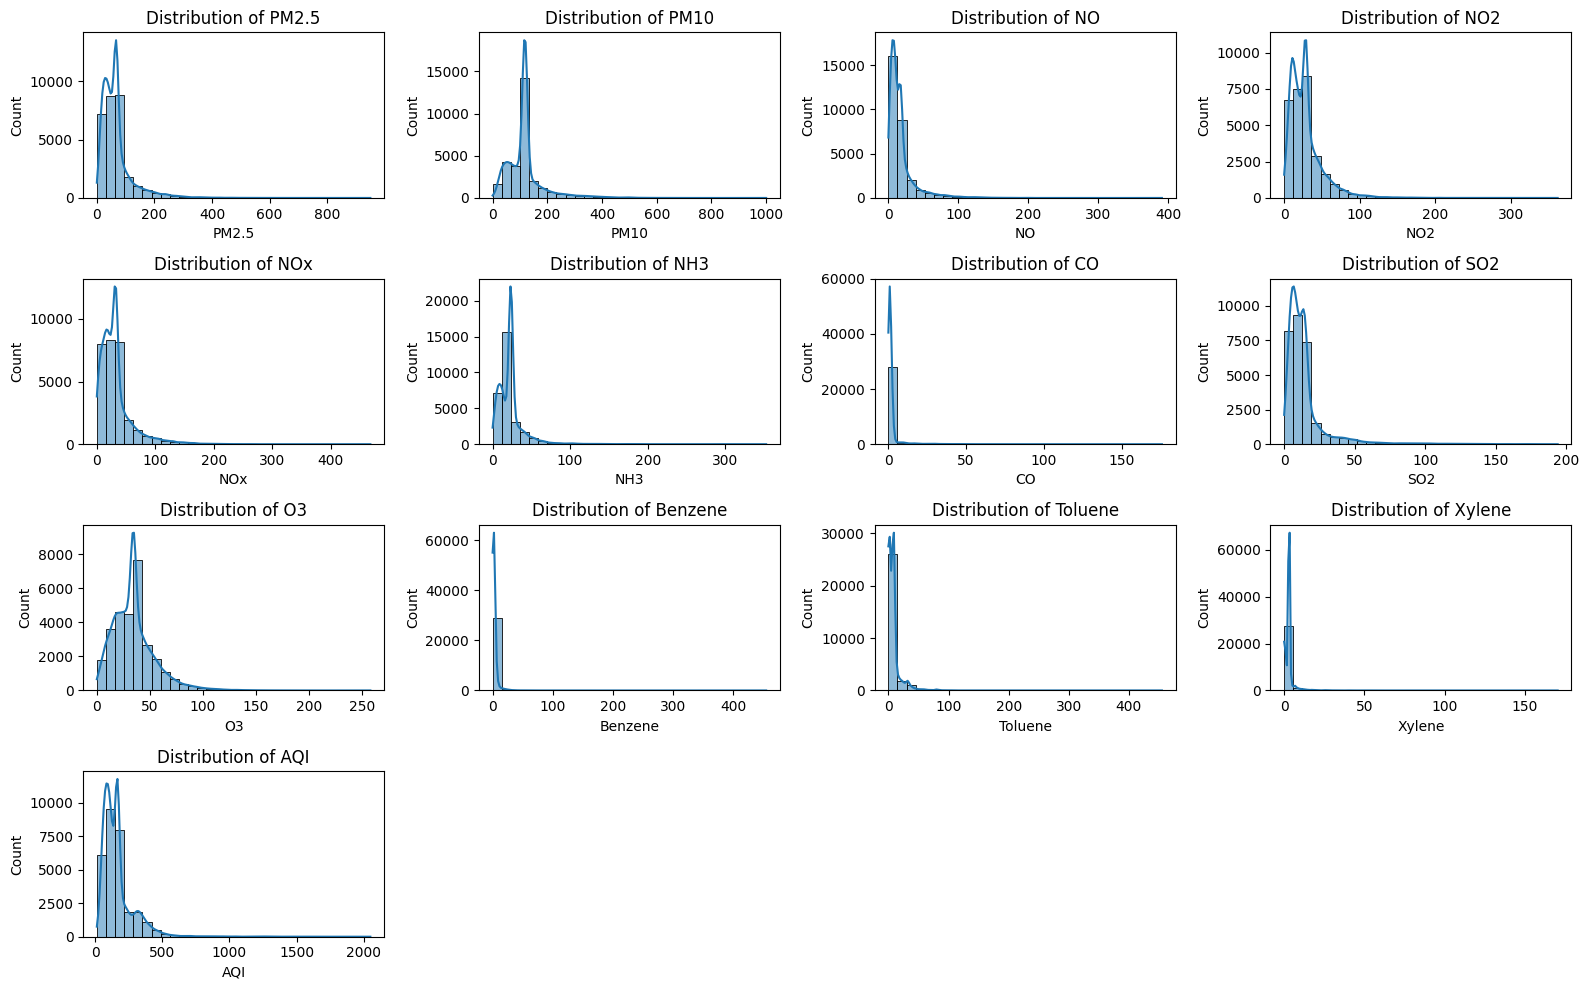

In [39]:
# Visualize the distribution of pollutants and AQI
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 4, i)
    sns.histplot(d[pollutant], kde=True, bins=30)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()


### Correlation Matrix:

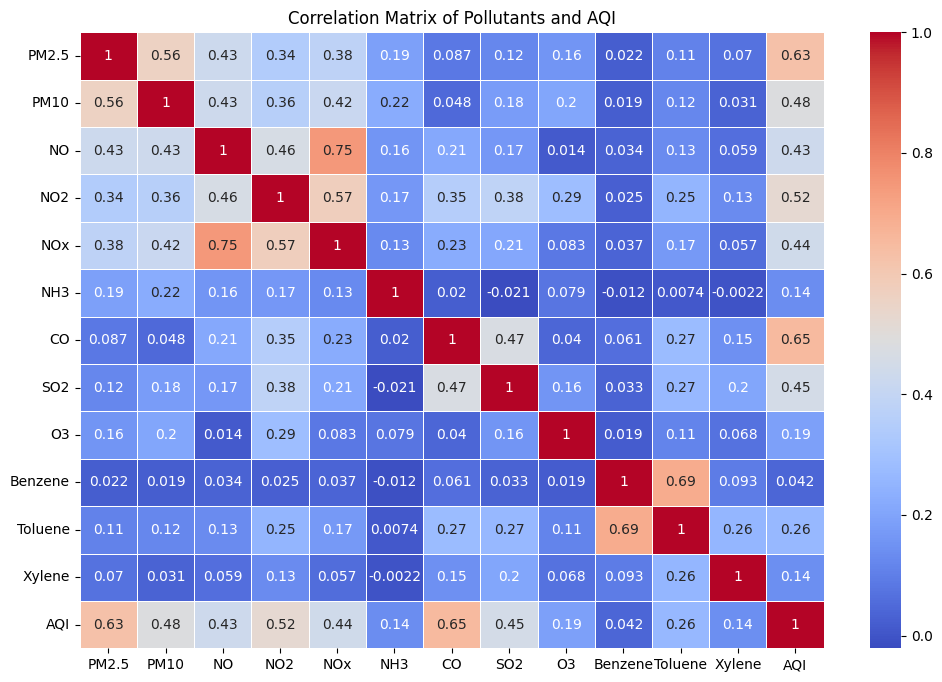

In [40]:
# Correlation matrix to check relationships between pollutants and AQI
plt.figure(figsize=(12, 8))
sns.heatmap(d[pollutants].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()


### 2. Time Series Analysis of AQI

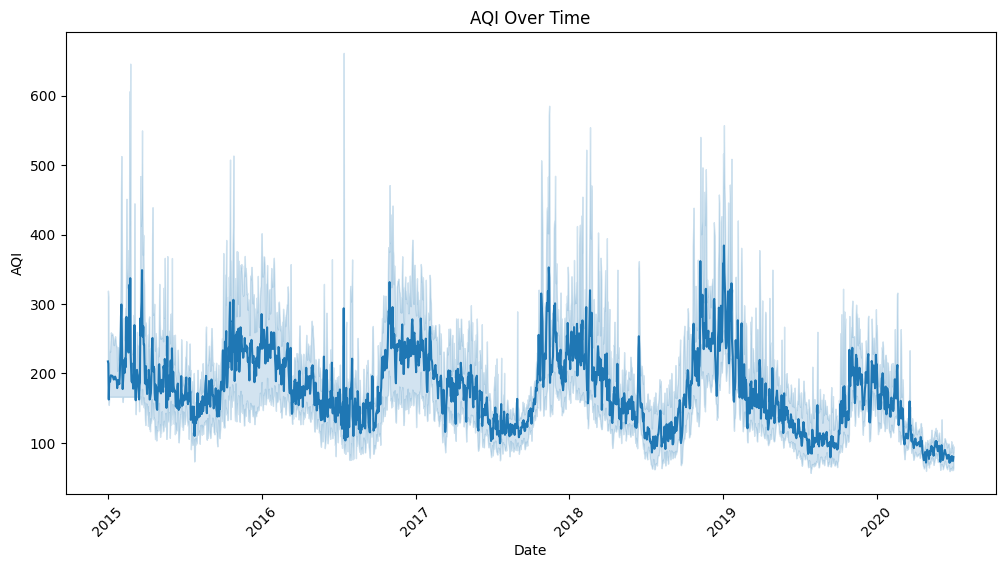

In [41]:
# Plot AQI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AQI', data=d)
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()
